<h1>Prosper Loan Dataset Exploration</h1>

## Table of contents
<ul>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<h2>Preliminary Wrangling of our dataset</h2>

This project delves into the 'Prosper Loan dataset'. This dataset comprises of the information from a Loan service company called Prosper. It seeks to make more meaning from the dataset using appropriate visualizations which simply tells the story of certain aspects of our data.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [20]:
# To load in the Prosper dataset into a pandas dataframe, view the shape & column types, then print a sample
pld = pd.read_csv(r'C:\Users\Patrick\Downloads\Documents\prosperLoanData.csv')
print(pld.shape)
print(pld.dtypes)
pld.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### What is the structure of your dataset?

Our original dataset comprises of 113,937 rows of data & 81 columns.

From the Data Dictionary, it is obvious we won't make use of all 81 columns in our dataset. We need to properly identify the most important columns to keep for our analysis.

In [21]:
major_columns = ['ListingKey', 'LoanStatus', 'ClosedDate', 'Term', 'ProsperRating (Alpha)', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus',
'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations', 'Investors' ]

In [22]:
pld_col = pld[major_columns]

In [23]:
pld_col.shape

(113937, 15)

Our revamped dataset is now in a good shape to be visualized

In [24]:
pld_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   LoanStatus                 113937 non-null  object 
 2   ClosedDate                 55089 non-null   object 
 3   Term                       113937 non-null  int64  
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   BorrowerRate               113937 non-null  float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   EmploymentStatus           111682 non-null  object 
 8   DelinquenciesLast7Years    112947 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  TotalProsperLoans          22085 non-null   float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  Recommendations            11

In [25]:
pld_col.sample(5)

,ListingKey,LoanStatus,ClosedDate,Term,ProsperRating (Alpha),BorrowerRate,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
94019,E6B135357047536485F18B6,Current,NaN,36,E,0.3058,1,Employed,37.0,3750.000000,NaN,4000,2012-01-11 00:00:00,0,1
19330,13453599562822763F1C1FE,Current,NaN,60,C,0.1570,15,Employed,0.0,11511.333333,1.0,15000,2014-03-05 00:00:00,0,1
69368,761F3382117717987A1F7D9,Completed,2009-03-17 00:00:00,36,NaN,0.1000,0,Full-time,24.0,5189.666667,NaN,7500,2007-02-27 00:00:00,0,1
66702,A65A3566789184075D36995,Current,NaN,36,AA,0.0759,16,Employed,0.0,6066.666667,1.0,2250,2013-06-06 00:00:00,0,40
30494,6D2A349515407382804B2C3,Chargedoff,2011-12-28 00:00:00,36,E,0.3435,1,Full-time,0.0,10333.333333,1.0,4500,2010-09-28 00:00:00,0,125


### What is/are the main feature(s) of interest in your dataset?

The greatest aim and concern for Loan companies like Prosper, would be to give out loans to the right entities that would be able to pay back in good time.

Our main features would therefore be to be able to <b>successfully predict and determine individuals/entities</b> that would <b>NOT default on their loan repayments schedule</b>.

In [26]:
# Some descriptive statistics for numeric variables
print(pld_col.describe())

                Term   BorrowerRate  ListingCategory (numeric)  \
count  113937.000000  113937.000000              113937.000000   
mean       40.830248       0.192764                   2.774209   
std        10.436212       0.074818                   3.996797   
min        12.000000       0.000000                   0.000000   
25%        36.000000       0.134000                   1.000000   
50%        36.000000       0.184000                   1.000000   
75%        36.000000       0.250000                   3.000000   
max        60.000000       0.497500                  20.000000   

       DelinquenciesLast7Years  StatedMonthlyIncome  TotalProsperLoans  \
count            112947.000000         1.139370e+05       22085.000000   
mean                  4.154984         5.608026e+03           1.421100   
std                  10.160216         7.478497e+03           0.764042   
min                   0.000000         0.000000e+00           0.000000   
25%                   0.000000     

We will be dropping the missing values in the ProsperRating (Alpha) column due to large missing data

In [27]:
pld_col = pld_col.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Also, We need to fill the dates prior to the year 2009 with o's. 

In [28]:
pld_col['TotalProsperLoans'] = pld_col['TotalProsperLoans'].fillna(0)

In [29]:
pld_col.sample(5)

,index,ListingKey,LoanStatus,ClosedDate,Term,ProsperRating (Alpha),BorrowerRate,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
18785,25213,9D1535724180389523CAB48,Current,NaN,36,A,0.1299,1,Employed,0.0,6259.083333,0.0,15000,2013-02-27 00:00:00,0,234
50973,68497,8A6635277521627066E4EEF,Chargedoff,2012-06-30 00:00:00,36,E,0.3199,3,Self-employed,0.0,1250.000000,0.0,5000,2011-09-30 00:00:00,0,1
58134,78095,17A8357947854333642010D,Current,NaN,36,C,0.1774,2,Employed,0.0,4583.333333,0.0,2000,2013-05-29 00:00:00,0,1
30518,40960,4B013587697016741743CF3,Current,NaN,60,B,0.1699,1,Employed,2.0,4791.666667,0.0,13000,2013-08-27 00:00:00,0,1
50882,68380,C197350910455972474F6A1,Completed,2013-06-11 00:00:00,36,A,0.0829,1,Employed,0.0,9166.666667,1.0,15000,2011-02-25 00:00:00,0,62


Next, we convert these column datatypes from object to datatime datatypes

In [30]:
pld_col['LoanOriginationDate'] = pd.to_datetime(pld_col['LoanOriginationDate'])

In [31]:
pld_col['ClosedDate'] = pd.to_datetime(pld_col['ClosedDate'])

In [32]:
pld_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   ListingKey                 84853 non-null  object        
 2   LoanStatus                 84853 non-null  object        
 3   ClosedDate                 26005 non-null  datetime64[ns]
 4   Term                       84853 non-null  int64         
 5   ProsperRating (Alpha)      84853 non-null  object        
 6   BorrowerRate               84853 non-null  float64       
 7   ListingCategory (numeric)  84853 non-null  int64         
 8   EmploymentStatus           84853 non-null  object        
 9   DelinquenciesLast7Years    84853 non-null  float64       
 10  StatedMonthlyIncome        84853 non-null  float64       
 11  TotalProsperLoans          84853 non-null  float64       
 12  Loan

Observation: The datatypes have been updated to datetime64[ns].

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The ProsperRating (Alpha) column, LoanStatus column, EmploymentStatus, StatedMonthlyIncome columns and LoanOriginationDate would play a massive role in helping to successfully predict loan defaulters.

<a id='univariate'></a>

<h2>Univariate Exploration</h2>

Fun fact
Question 1 - What are the colors at our disposal?

In [33]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Observation - We have about 10 different colours to select from.

Question 2 - What is the composition/makeup of the ProsperRating (Alpha) column?

Firstly, we need to sort the Prosper rating column. ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [34]:
# To make sure our ordinal ratings are maintained from AA TO HR
ordinal_ratings_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}
ordered_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_ratings_dict['ProsperRating (Alpha)'])
pld_col['ProsperRating (Alpha)'] = pld_col['ProsperRating (Alpha)'].astype(ordered_ratings)

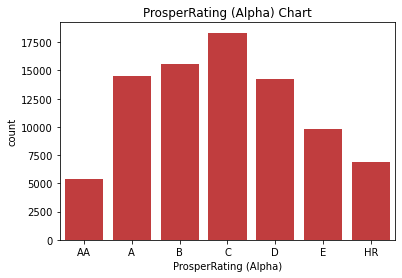

In [35]:
base_color = sb.color_palette()[3]
plt.xticks(rotation=0)
sb.countplot(data=pld_col, x='ProsperRating (Alpha)', color = base_color); 
plt.title("ProsperRating (Alpha) Chart");

Observations
1. According to the ratings as stipulated in the Prosper company data dictionary, (0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA), 7 - AA is the highest possible rating. From the univariate barchat above, ONLY about 5,000 Prosper customers fall into this category out of a possible 90,000. 

2. Also, the most frequent Prosper rating is the 'C' alphabet. 

To see the same information depicted on a pie chart

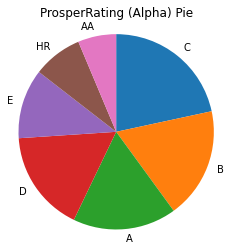

In [36]:
ratings_counts = pld_col['ProsperRating (Alpha)'].value_counts()

plt.pie(ratings_counts, labels = ratings_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title("ProsperRating (Alpha) Pie");

Observation - It seems difficult to know which is the most frequent variable using the pie chart which ids the disadvantage of Pie charts.

Question 3 - What is the current status of Prosper Loans

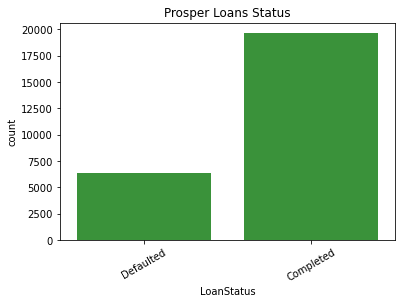

In [54]:
base_color = sb.color_palette()[2]
plt.xticks(rotation=30)
sb.countplot(data=pld_col, x='LoanStatus', color = base_color);
plt.title("Prosper Loans Status");

Observations: 

1. A huge majority of Prosper loans are completed. This is good.
2. Loan Defaulters constitute less than 50% of total loans disbursed.

Question 4 - What is the outlook of the <b>Employment Status of Prosper Loanees</b>?

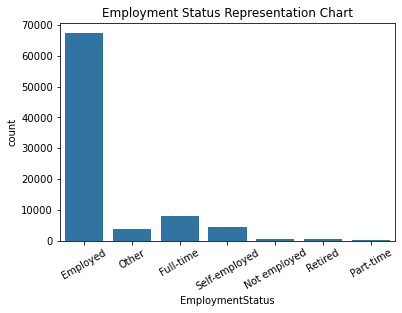

In [38]:
base_color = sb.color_palette()[0]
sb.countplot(data = pld_col, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 30);
plt.title("Employment Status Representation Chart");

Observation
1. A vast majority of Prosper Loanees are 'Employed'. This is a good sign.

Question 5(Stated Monthly Income) - What are the monthly income of Prosper loanees?

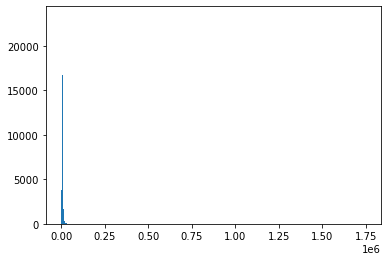

In [39]:
plt.hist(data=pld_col, x='StatedMonthlyIncome', bins=1000);

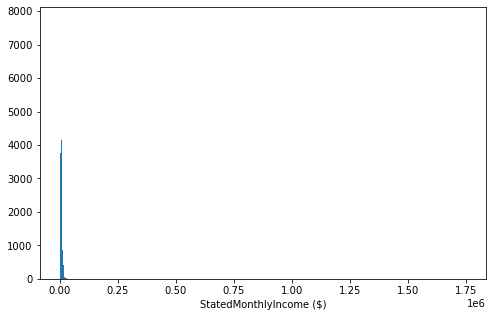

In [40]:
# Using a standard-scaled plot
binsize = 500
bins = np.arange(0, pld_col['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pld_col, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome ($)')
plt.show()

The resultant plot is still similar to the first plot.

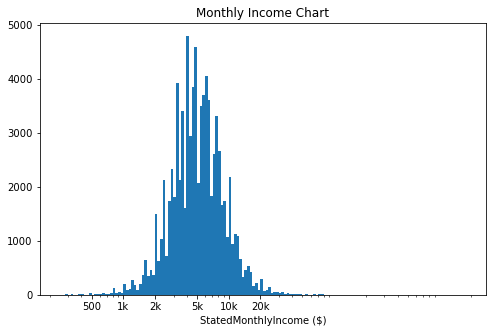

In [41]:
# Due to long tail in the distribution, we have to put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(pld_col['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pld_col, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.title("Monthly Income Chart");
plt.show()

Observations - Voila!!! There are some massive outliers as seen from the histogram plotted above. Majority(if not all) of the loanees monthly income falls arond the 5,000 mark. This is obvious from the long tail(rightly skewed data) noticed in our histogram above. Also, a peak is observed around 2,000 and 5,000. The plot seems to be normally(Bell shaped) distributed.

<a id='bivariate'></a>

<h2>Bivariate Exploration<h2/>

<h5>Bivariate Visualizations - Both quantitative & qualitative variables<h5>

Question 1:
Is there a positive correlation between 'EmploymentStatus' & 'ProsperRating (Alpha)' columns? 

<b>ProsperRating (Alpha) vs EmploymentStatus</b>

In [42]:
# Also to make sure our ordinal ratings are maintained from AA TO HR
ordinal_ratings_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}
ordered_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_ratings_dict['ProsperRating (Alpha)'])
pld_col['ProsperRating (Alpha)'] = pld_col['ProsperRating (Alpha)'].astype(ordered_ratings)

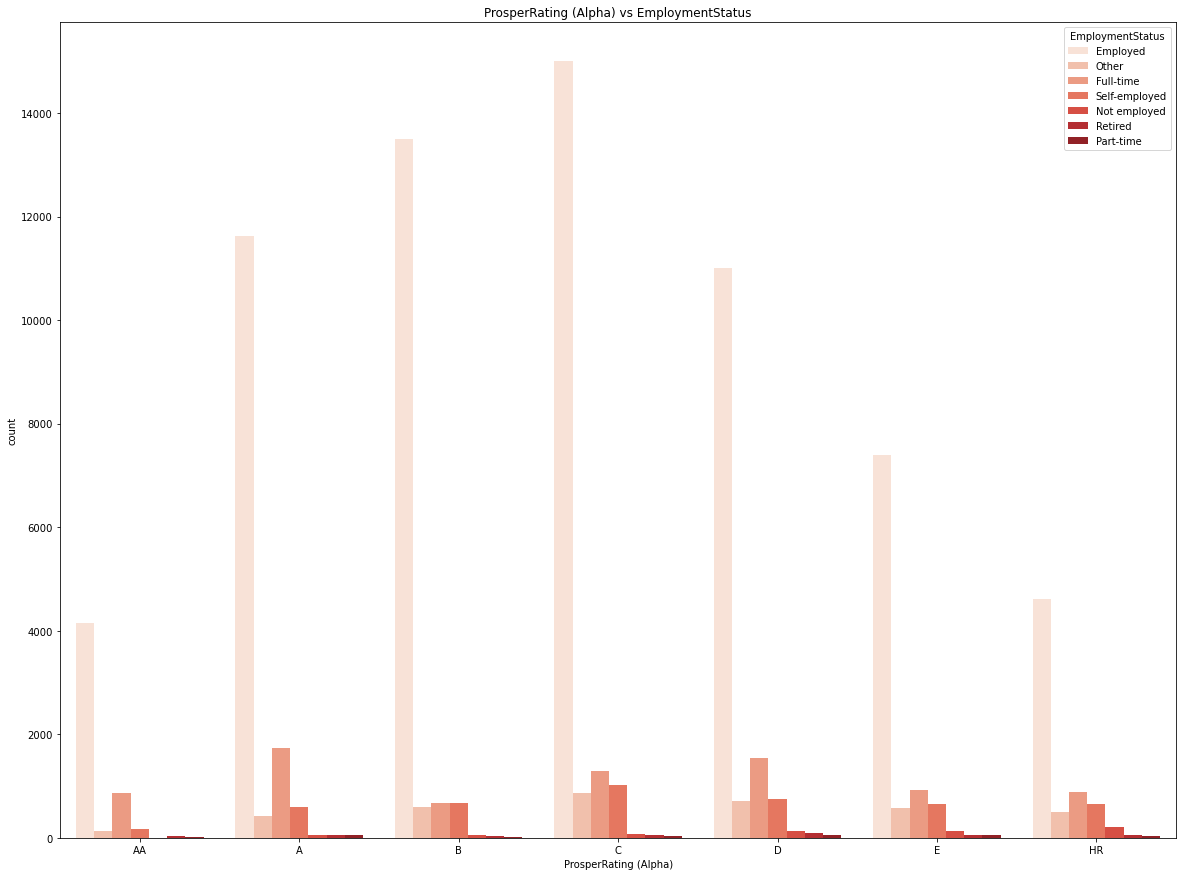

In [43]:
plt.figure(figsize = [20, 15])
sb.countplot(data = pld_col, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Reds');
plt.title("ProsperRating (Alpha) vs EmploymentStatus");

Observation: It is very obvious from the charts above, that a positive correlation exists between both variables.

Question 2:
What is the result of examining the relationship between some of our quantitative variables.

In [44]:
quant_var = ['StatedMonthlyIncome', 'LoanOriginalAmount', 'TotalProsperLoans']

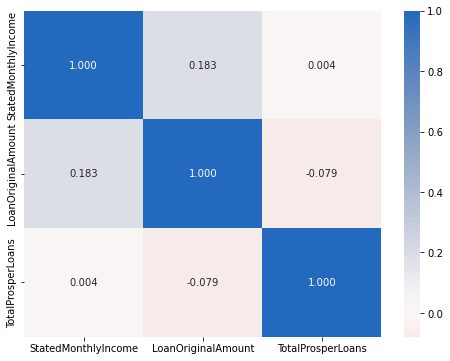

In [45]:
plt.figure(figsize = [8, 6])
sb.heatmap(pld_col[quant_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Observation

1. The 'StatedMonthlyIncome' is highly correlated with the 'TotalProsperLoan'.

2. Also, the 'LoanOriginalAmount' is correlated to the 'StatedMonthlyIncome'.

<b> Reminder </b>

<b>Scatter plots - Quantitative variable vs Quantitative variable

Violin - Quantitative variable vs Qualitative variable

Clustered Bar charts - Qualitative variable vs Qualitative variable</b>

Please note - Bivariate visuals are used to look at relationships.

Pearson correlation coefficient(r) - captures linear relationship. From -1 to +1

<b>Question 3: What is the relationship between the LoanStatus vs LoanOriginalAmount</b>

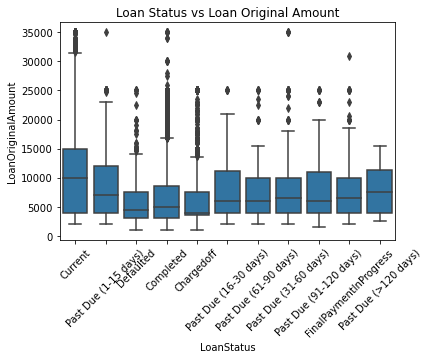

In [46]:
sb.boxplot(data = pld_col, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title("Loan Status vs Loan Original Amount");
plt.xticks(rotation = 45);

Observation: We cant depict anything because of the overlapping of LoanStatus labels.

To solve the issue above we would have to melt some of our variable labels with the same end product. For example, The current status of the loan: Chargedoff, Defaulted etc all imply that the transaction wasnt completed ie they defaulted. Here they are seperated into three(3) which is Completed, Chargedoff & Defaulted.

In [47]:
status = (pld_col['LoanStatus'] == 'Completed') | (pld_col['LoanStatus'] == 'Defaulted') |\
                  (pld_col['LoanStatus'] == 'Chargedoff')
pld_col = pld_col[status]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
pld_col['LoanStatus'] = pld_col.apply(change_to_defaulted, axis=1)

In [48]:
pld_col['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

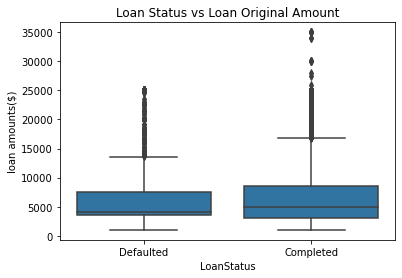

In [49]:
sb.boxplot(data = pld_col, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title("Loan Status vs Loan Original Amount");
plt.ylabel("loan amounts($)");

Observations: 
1. From the 'Box Plot' above, we can clearly state that defaulters seems to be lesser than those with completed credits results.
2. The Defaulted which comprises of Chargedoff, are mostly loanees with smaller LoanOriginalAmounts.

<b>Question 4 - Visually compare the difference between the Defaulted & Completed customers.</b>

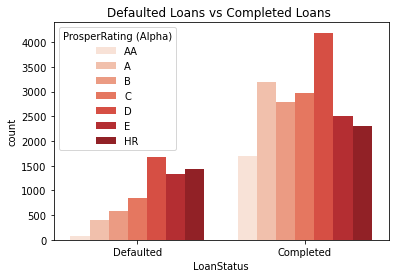

In [50]:
sb.countplot(data = pld_col, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds')
plt.title("Defaulted Loans vs Completed Loans ");

Observation - Customers rated from A, AA, B & C are most likely to complete their loan repayments.

Also, majority of the 'Defaulted' customers have a rating of 'D'.

What is a quick summary of all parameters in our dataset using a histogram?

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'ClosedDate'}>,
        <AxesSubplot:title={'center':'Term'}>],
       [<AxesSubplot:title={'center':'BorrowerRate'}>,
        <AxesSubplot:title={'center':'ListingCategory (numeric)'}>,
        <AxesSubplot:title={'center':'DelinquenciesLast7Years'}>],
       [<AxesSubplot:title={'center':'StatedMonthlyIncome'}>,
        <AxesSubplot:title={'center':'TotalProsperLoans'}>,
        <AxesSubplot:title={'center':'LoanOriginalAmount'}>],
       [<AxesSubplot:title={'center':'LoanOriginationDate'}>,
        <AxesSubplot:title={'center':'Recommendations'}>,
        <AxesSubplot:title={'center':'Investors'}>]], dtype=object)

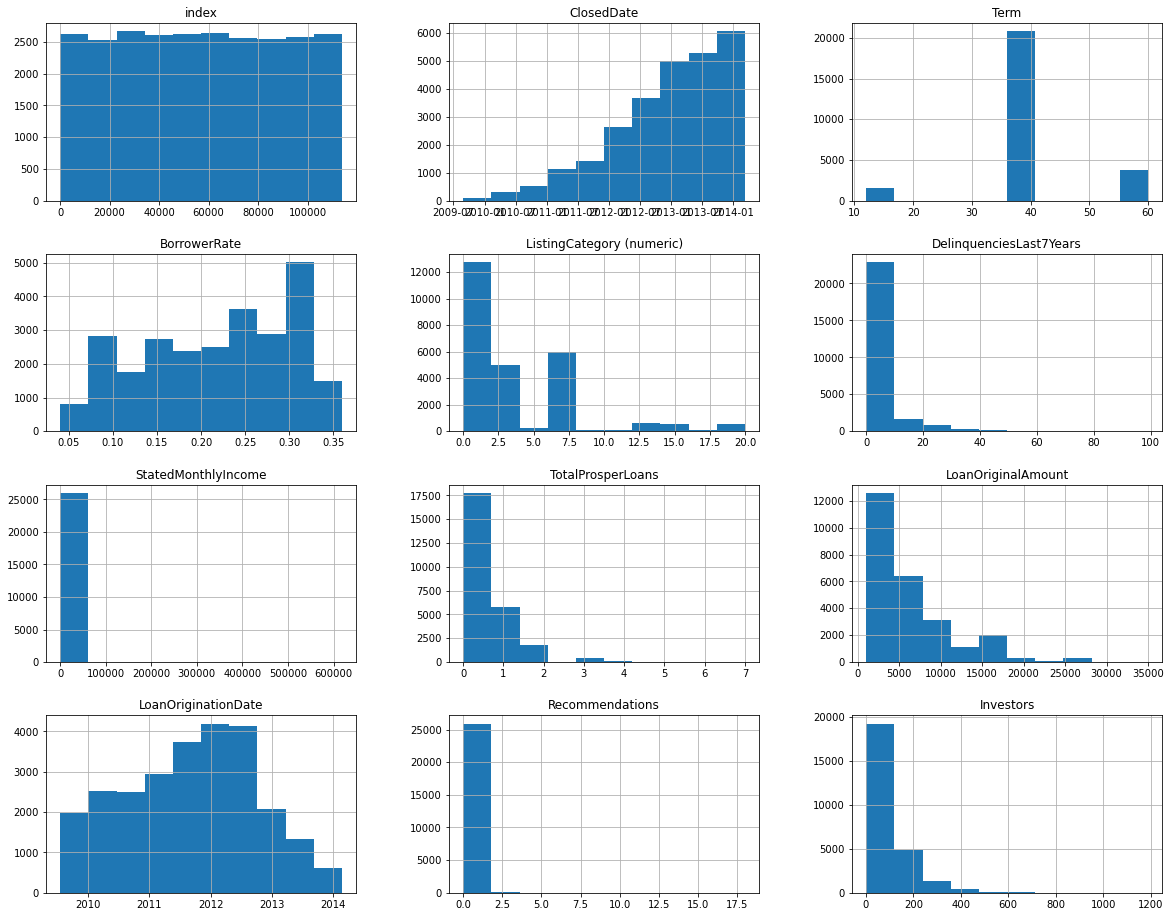

In [51]:
pld_col.hist(figsize=(20,16))

Observation: We can see the quick summary of all parameters in our dataset like StatedMonthlyIncome etc...

<a id='multivariate'></a>

<h2>Multivariate Exploration<h2/>

Question 1: To visualize the Rating, Loan Amount and Loan Status relationship.

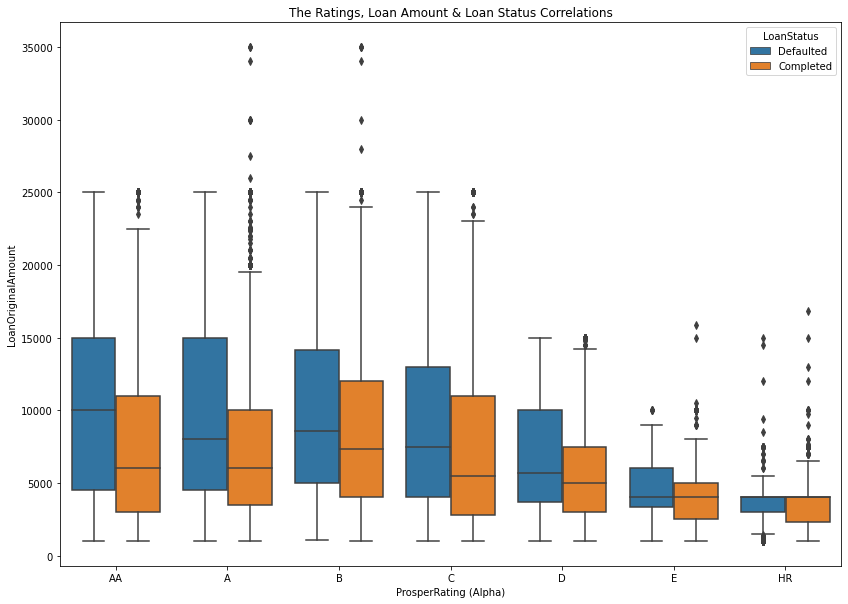

In [52]:
plt.figure(figsize = [14, 10])
sb.boxplot(data=pld_col, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title("The Ratings, Loan Amount & Loan Status Correlations");

Observations
1. Defaulted loanees seem to be higher than expected and many such loanees seem to possess high ProsperRatings.

2. Many defaulters have a low ProsperRating (Alpha).

<b>Question 2: How does the Loan Amount, ProsperRating and Loan Status relate to each other?</b>

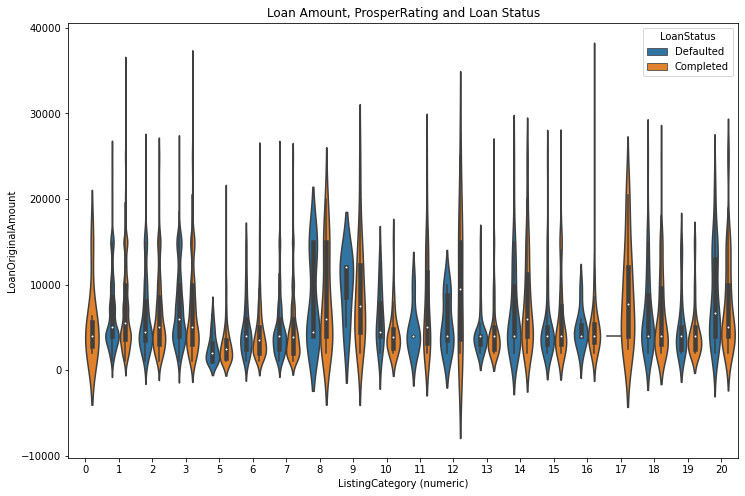

In [53]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=pld_col, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title("Loan Amount, ProsperRating and Loan Status");

Observation: From the violin plot above, it seems as though there is NO correlation between the Loan Amounts and the Listing categories.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Chargedoff loanees seem to be higher than expected and many chargedoff loanees seem to possess high ProsperRatings.

2. Many defaulters have a low ProsperRating (Alpha).

3. Defaulters are quite as much as Completed loanees.